# Leren: Programming assignment 3
** This assignment can be done in teams of 2 **

**Student 1:**  <span style="color:red">Tycho Koster</span> (<span style="color:red">10667687</span>)<br>
**Student 2:** <span style="color:red">David Stap</span> (<span style="color:red">10608516</span>)<br>

-----------------------------------
This notebook provides a template for your programming assignment 3. You may want to use parts of your code from the previous assignment(s) as a starting point for this assignment. 

The code you hand-in should follow the structure from this document. Each part of the assignment has its own cell, you are free to add more cells. Note that the structure corresponds with the structure from the actual programming assignment. Make sure you read this for the full explanation of what is expected of you.

**Submission:**

* Make sure your code can be run from top to bottom without errors.
* Include your data files in the zip file.
* Comment your code

One way be sure you code can be run without errors is by quiting iPython completely and then restart iPython and run all cells again (you can do this by going to the menu bar above: Cell > Run all). This way you make sure that no old definitions of functions or values of variables are left (that your program might still be using).

-----------------------------------

If you have any questions ask your teaching assistent. We are here for you.

-----------------------------------

## Regularized Logistic Regression
a) Implementation

In [109]:
import math
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [110]:
# add data
# X1  X2  X3  Y
# 10  4   4   0
# 7   3   3   0 
# 5   4   2   1
# 2   3   1   1
def read_logistic_data():
    x = []
    y= []
    y.append(0)
    y.append(0)
    y.append(1)
    y.append(1)
    x.append([10.0, 7.0,5.0,2.0])
    x.append([4.0, 3.0, 4.0, 3.0])
    x.append([4.0, 3.0, 2.0, 1.0])  
    return x, y


def create_theta_array(x):
    theta = [0.5]
    for i in range(len(x)):
        theta.append(0.5)
    return theta


x, y = read_logistic_data()
theta_array = create_theta_array(x)

In [111]:
'''
gradient_function_logistic
Input: alpha (learning rate), theta_array (list of theta values), x (list of multiple features with values), y (list of values), 
lam (regularization variable called lambda)
Output: gradient for every theta in array
'''

def gradient_function_logistic(alpha, theta_array, theta, x, y, lam):
    m = len(x)
    totalsum = 0
    for i in range(0, len(x[0])):
        temp_x = []
        #temporary x for the values of all features at that specific index
        for j in range(len(x)):
            temp_x.append(x[j][i])
        if theta == 0:
            totalsum += (Hx_logistic(theta_array, temp_x) - y[i])
        else:
            totalsum += (Hx_logistic(theta_array, temp_x) - y[i])*x[theta-1][i] + (lam/m)*theta_array[theta]
    return (alpha*totalsum)/m
    
'''
Hx_logistic
Input: theta_array (list of theta values), x (list of values)
Output: prediction of y with logistic hypotheses calculations
'''
def Hx_logistic(theta_array, x):
    exponent = theta_array[0]
    for i in range(1, len(theta_array)):
        exponent += theta_array[i]*x[i-1]
    e = -exponent
    return 1.0/(1 + math.exp(e))

'''
update_theta_logistic
Input: alpha (learning rate), theta_array (list of theta values), x (list of multiple features with values), y (list of values),
iterations (number of iterations to be done), lam (regularization variable called lambda)
Output: All values of theta after the amount of iterations with the use of logistic regression.
'''
def update_theta_logistic(alpha, theta_array, x, y, iterations, lam):
    costs = []
    costs.append(cost_function_logistic(theta_array, x, y, lam))
    for i in range(iterations):
        for j in range(len(theta_array)):
            theta_array[j] -= gradient_function_logistic(alpha, theta_array,j, x, y,lam)
        costs.append(cost_function_logistic(theta_array, x, y, lam))
    return theta_array, costs

'''
cost_function_logistic
Input: theta_array (list of theta values), x (list of multiple features with values), y (list of values)
Output: The cost of the theta values with logistic regression.
'''
def cost_function_logistic(theta_array, x, y, lam):
    m = len(x[0])
    totalsum = 0
    regsum = 0
    for i in range(len(x[0])):
        temp_x = []
        for j in range(len(x)):
            temp_x.append(x[j][i])
        if(y[i] == 1):
            totalsum += math.log10(Hx_logistic(theta_array, temp_x))
        else:
            totalsum += math.log10(1 - Hx_logistic(theta_array, temp_x))
        if(i != 0):
            regsum += theta_array[i]**2
    cost = -(1.0/m)*(totalsum)
    regcost = (lam/(2*m))*regsum
    return cost + regcost

In [112]:
thetas, costs = update_theta_logistic(0.01, [0.5,0.5,0.5,0.5], x, y, 5, 1)
print("Theta array:")
print(thetas)
print("Cost array:")
print(costs)
thetas, costs = update_theta_logistic(0.01, [0.5,0.5,0.5,0.5], x, y, 5, 5)
print("Theta array:")
print(thetas)
print("Cost array:")
print(costs)
thetas, costs = update_theta_logistic(0.01, [0.5,0.5,0.5,0.5], x, y, 5, 10)
print("Theta array:")
print(thetas)
print("Cost array:")
print(costs)
thetas, costs = update_theta_logistic(0.01, [0.5,0.5,0.5,0.5], x, y, 5, 20)
print("Theta array:")
print(thetas)
print("Cost array:")
print(costs)

Theta array:
[0.4676100856139274, 0.21927812358551907, 0.3868218062359511, 0.384922572224571]
Cost array:
[1.7950707304149853, 1.6554548811715786, 1.5164253042078095, 1.3782109451928626, 1.2411554407953922, 1.105784538018239]
Theta array:
[0.4677171016793583, 0.1946150220736454, 0.3578447355339643, 0.3558086844584255]
Cost array:
[1.7950707304149853, 1.6332341486262159, 1.4743218667953464, 1.3186402360485057, 1.1666805280668868, 1.0192321839390655]
Theta array:
[0.46797337298990355, 0.14995351216740532, 0.3048955142645279, 0.3025627761979979]
Cost array:
[2.5450707304149853, 2.185883025311374, 1.860593758441854, 1.567172085360498, 1.3042241593658381, 1.071210299903874]
Theta array:
[0.46848526296379805, 0.09383877746177971, 0.2371061141435325, 0.2342897647243424]
Cost array:
[3.2950707304149853, 2.611894814674272, 2.04748834713378, 1.5847217523947499, 1.2103950945362048, 0.9150225668570028]


b) Two small datasets

In [113]:
'''
gradient_function_logistic
Input: alpha (learning rate), theta_array (list of theta values), x (list of multiple features with values), y (list of values), 
lam (regularization variable called lambda)
Output: gradient for every theta in array
'''

def gradient_function_quadratic(alpha, theta_array, theta, x, y, lam):
    m = len(x)
    totalsum = 0
    for i in range(0, len(x[0])):
        temp_x = []
        #temporary x for the values of all features at that specific index
        for j in range(len(x)):
            temp_x.append(x[j][i])
        if theta == 0:
            totalsum += (Hx_quadratic(theta_array, temp_x) - y[i])
        else:
            totalsum += (Hx_quadratic(theta_array, temp_x) - y[i])*x[theta-1][i] + (lam/m)*theta_array[theta]
    return (alpha*totalsum)/m
    
'''
Hx_logistic
Input: theta_array (list of theta values), x (list of values)
Output: prediction of y with logistic quadratic hypotheses calculations
'''
def Hx_quadratic(theta_array, x):
    exponent = theta_array[0]
    for i in range(1, len(theta_array)):
        exponent += (theta_array[i]*x[i-1])**2 + theta_array[i]*x[i-1]
    e = -exponent
    return 1.0/(1 + math.exp(e))
'''
update_theta_quadratic
Input: alpha (learning rate), theta_array (list of theta values), x (list of multiple features with values), y (list of values),
iterations (number of iterations to be done), lam (regularization variable called lambda)
Output: All values of theta after the amount of iterations with the use of logistic regression with quadratic terms.
'''
def update_theta_quadratic(alpha, theta_array, x, y, iterations, lam):
    costs = []
    costs.append(cost_function_logistic(theta_array, x, y, lam))
    for i in range(iterations):
        for j in range(len(theta_array)):
            theta_array[j] -= gradient_function_quadratic(alpha, theta_array,j, x, y,lam)
        costs.append(cost_function_quadratic(theta_array, x, y, lam))
    return theta_array, costs

'''
cost_function_quadratic
Input: theta_array (list of theta values), x (list of multiple features with values), y (list of values), 
lam (regularization variable called lambda)
Output: The cost of the theta values with logistic regression and the use of quadratic terms.
'''
def cost_function_quadratic(theta_array, x, y, lam):
    m = len(x[0])
    totalsum = 0
    regsum = 0
    for i in range(len(x[0])):
        temp_x = []
        for j in range(len(x)):
            temp_x.append(x[j][i])
        if(y[i] == 1):
            totalsum += math.log10(Hx_quadratic(theta_array, temp_x))
        else:
            totalsum += math.log10(1 - Hx_quadratic(theta_array, temp_x))
        if(i != 0):
            regsum += theta_array[i]**2
    cost = -(1.0/m)*(totalsum)
    regcost = (lam/(2*m))*regsum
    return cost + regcost

#dataset1
# X1  X2  X3  Y
# 2   2   6   0
# 3   10  3   1 
# 5   4   8   1
# 5   3   1   1
#dataset2
# X1  X2  X3  Y
# 1   8   6   0
# 1   10  2   1 
# 1   3   8   0
# 1   3   10  1

data1 = [[2,3,5,5], [2,10,4,3], [6,3,8,1], [0,1,1,1]]
data2 = [[1,1,1,1], [8,10,3,3], [6,2,8,10], [0,1,0,1]]

theta_array, costs = update_theta_quadratic(0.01, [0.5,0.5,0.5,0.5], data1[:-1], data1[-1], 5, 10)
print("Dataset 1, lambda 10:")
print(theta_array)
print(costs)
theta_array, costs = update_theta_quadratic(0.01, [0.5,0.5,0.5,0.5], data1[:-1], data1[-1], 5, 20)
print("Dataset 1, lambda 20:")
print(theta_array)
print(costs)
theta_array, costs = update_theta_quadratic(0.01, [0.5,0.5,0.5,0.5], data1[:-1], data1[-1], 5, 30)
print("Dataset 1, lambda 50:")
print(theta_array)
print(costs)
theta_array, costs = update_theta_quadratic(0.01, [0.5,0.5,0.5,0.5], data2[:-1], data2[-1], 5, 10)
print("Dataset 2, lambda 10:")
print(theta_array)
print(costs)
theta_array, costs = update_theta_quadratic(0.01, [0.5,0.5,0.5,0.5], data2[:-1], data2[-1], 5, 20)
print("Dataset 2, lambda 20:")
print(theta_array)
print(costs)
theta_array, costs = update_theta_quadratic(0.01, [0.5,0.5,0.5,0.5], data2[:-1], data2[-1], 5, 50)
print("Dataset 2, lambda 50:")
print(theta_array)
print(costs)

Dataset 1, lambda 10:
[0.48333393397321095, 0.3769174072044312, 0.37691759822534837, 0.3153752546952773]
[1.3483623209398385, 2.2405165372950107, 1.9702086692356358, 1.7278580873418512, 1.5110068915446093, 1.3174096394766437]
Dataset 1, lambda 20:
[0.4833387327556216, 0.3011501785353169, 0.3011547444273259, 0.24433914106292123]
[2.0983623209398385, 2.681904552765869, 2.1773880982985094, 1.760886290542037, 1.418117277382204, 1.1372060784827966]
Dataset 1, lambda 50:
[0.4833836905807097, 0.2190917221663012, 0.21913484459417723, 0.16809571416161523]
[2.8483623209398385, 2.939183191907527, 2.127570609398261, 1.5323323549478323, 1.0985897997569969, 0.7865126410682932]
Dataset 2, lambda 10:
[0.46666738304161043, 0.3769158516226776, 0.23844704907640216, 0.19229748235574637]
[2.3246760194216627, 5.651641672486517, 4.440440696847019, 3.4202193064938955, 2.5721822245081167, 1.879440548326369]
Dataset 2, lambda 20:
[0.4666779644412624, 0.30114222457405077, 0.1733290837578151, 0.1308425154884171]


**Discussion:**

***Question 1a***

We used different values for the regularization variable lambda, this way we could see what the costs were with different values. It is noticable that for a higher lambda value the cost at the start is higher, but the cost after the same amount of iterations is less. How higher the lambda how faster the cost becomes less. The down side is that it starts with a higher cost.

***Question 1b***

We used different values for the regularization variable lambda, this way we could see what the costs were with different values. What we noticed with the use of quadratic terms is that with the first iteration the cost goes up. But with the use of a high lamba value this changes and the cost only goes down from the start.

## 2) Neural Network


In [114]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_derivative(z):
    return z*(1-z)

a) Forward Propagation

In [115]:
'''
Input: 
- Input value(s) X
- List with weights for hidden layer(s) W
- Weights for final layer W_output (can be of a different dimension than
  W, because n of output values can be different than n of nodes in 
  hidden layers)
Output: 
- activation value(s) of y 
'''
def forward(X, W, W_output):    
    steps = list()
    steps.append(X)    
    # loop over weights for hidden layers
    for i in range(len(W)):
        steps.append(sigmoid(np.dot(steps[i], W[i])))    
    # for final value, use W_output
    steps.append(sigmoid(np.dot(steps[-1], W_output)))
    
    return steps, steps[-1]
  
    
#example run: calculate activation of Y for neural network in written3
X = np.array([[-5]])
W = np.array([[0.2]])
W_output = np.array([[0.1]])

steps, result = forward(X, W, W_output)
print 'intermediate steps: ', steps
print 'Y activation: ', result

intermediate steps:  [array([[-5]]), array([ 0.26894142]), array([ 0.50672313])]
Y activation:  [ 0.50672313]


In [124]:
# more fancy example run: calculate activation of y where:

inputLayerSize = 10
outputLayerSize = 3
hiddenLayerSize = 35
hiddenLayerDepth = 1


'''
Create weights for given dimensions.
If value == -1, random weights will be created.
If value == x, weights with value x will be created.
'''

def weights(inputLayerSize, outputLayerSize, hiddenLayerSize, hiddenLayerDepth, value):    
    W = list()
    W_output = 0
    
    if value == -1:
        # create random weight values for all hidden layers
        W = list()
        W.append(np.random.randn(inputLayerSize, hiddenLayerSize))
        if hiddenLayerDepth > 1:
            for i in range(hiddenLayerDepth):
                W.append(np.random.randn(hiddenLayerSize, hiddenLayerSize))

        # W_output might have different dimensions 
        # (if outputLayerSize != hiddenLayerSize)
        W_output = np.random.randn(hiddenLayerSize, outputLayerSize)
    
    if value != -1:
        W = list()
        W.append(np.full((inputLayerSize, hiddenLayerSize), value))
        if hiddenLayerDepth > 1:
            for i in range(hiddenLayerDepth):
                W.append(np.full((hiddenLayerSize, hiddenLayerSize), value))
            
        # W_output might have different dimensions 
        # (if outputLayerSize != hiddenLayerSize)
        W_output = np.full((hiddenLayerSize, outputLayerSize), value)
        
    return W, W_output

X = np.array([0,0,0,12,13,5,0,0,0,0])

W, W_output = weights(len(X), outputLayerSize, hiddenLayerSize, hiddenLayerDepth, -1)
steps, result = forward(X, W, W_output)
print 'Y activation: ', result

W, W_output = weights(len(X), outputLayerSize, hiddenLayerSize, hiddenLayerDepth, 0.5)
steps, result = forward(X, W, W_output)
print 'Y activation: ', result

Y activation:  [ 0.3961714   0.99322813  0.59852368]
Y activation:  [ 0.99999997  0.99999997  0.99999997]


b) Backpropagation on two logistic units

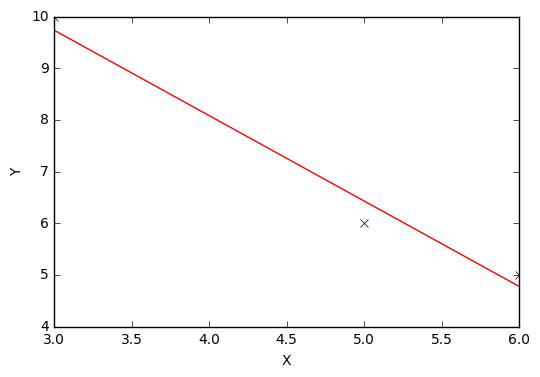

weights:  [ 14.69321372  -1.65275945]


In [117]:
'''
backpropagation for data from written assignment 1:
X  |  6  5  3
Y  |  5  6  10

Input:
- X (training examples + added row of ones for bias unit)
- y (y values)
- w (list with weights)
- alpha (learning rate)
- number of iterations
Output:
- weights after iterations
'''
def error_backpropagation(X, y, w, alpha, iterations):
    for t in range(iterations):
        grad = np.array([0., 0.])
        # loop through training examples
        for i in range(len(X)):
            x_i = X[i, :]
            y_i = y[i]
            h = np.dot(w, x_i)-y_i
            grad += 2*x_i*h

        # update weights
        w = w - alpha * grad

    plot(X, y, w) 
    return w

def plot(X, y, w):   
    tt = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 10)
    bf_line = w[0]+w[1]*tt
    plt.plot(X[:, 1], y, 'kx', tt, bf_line, 'r-')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    
    
X = np.array([[1,6], [1,5], [1,3]])
y = np.array([5,6,10])
w = np.array([0.5, 0.5])

weights = error_backpropagation(X, y, w, 0.001, 10000)
print "weights: ", weights

In [118]:
'''
backpropagation for written3 assignment 3.3

Input:
- X (training examples)
- y (y values)
- W (list with weights for hidden layers)
- W_output (weights for final hidden layer)
- alpha (learning rate)
- number of iterations
'''
def backpropagation_written3_3_3(X, y, W, W_output, alpha, iterations):
    steps, result = forward(X, W, W_output)
    
    print W, W_output
    
    if iterations > 0:

        print 'current output: ', result
        ### LAST WEIGHTS
        d_2 = result - y
        
        ### MIDDLE WEIGHTS
        d_1 = W_output * d_2 * sigmoid_derivative(steps[-2]) 
        
        dy_dtheta2 = steps[-2] * d_2
        
        # FIRST WEIGHTS
        dy_dtheta1 = X[0] * d_1

        ### UPDATE WEIGHTS
        W_updated = W - alpha * dy_dtheta1
        W_output_updated = W_output - alpha * dy_dtheta2

        steps, result = forward(X, W_updated, W_output_updated)
        print 'new output: ', result
        print '---------------'
        
        backpropagation_written3_3_3(X, y, W_updated, W_output_updated, alpha, iterations-1)


X = np.array([[-5]])
y = np.array([[1]])
W = np.array([[0.2]])
W_output = np.array([[0.1]])

backpropagation_written3_3_3(X, y, W, W_output, 0.1, 5)    

[[ 0.2]] [[ 0.1]]
current output:  [ 0.50672313]
new output:  [ 0.50775062]
---------------
[[ 0.19515079]] [[ 0.11326626]]
current output:  [ 0.50775062]
new output:  [ 0.50884808]
---------------
[[ 0.18960861]] [[ 0.12674085]]
current output:  [ 0.50884808]
new output:  [ 0.51002828]
---------------
[[ 0.1833438]] [[ 0.14045767]]
current output:  [ 0.51002828]
new output:  [ 0.51130569]
---------------
[[ 0.17632261]] [[ 0.15445258]]
current output:  [ 0.51130569]
new output:  [ 0.51269678]
---------------
[[ 0.16850717]] [[ 0.16876368]]


**Discussion:**

*** Question 2b ***

def backpropagation performs gradient descent using a neural network to find the best weights for theta_0 and theta_1. One input value is chosen, namely X. Also, a bias unit is added; this way we can make sure that the resulting formula for a line does not have to go through the origin. 

def backpropagation_written_3_3_3 is an additional function that calculates the values from written3 assignment 3.3. From the results it can be seen that the output correctly increases (because Y = 1).

c) Complete backpropagation on handwritten digit recognition

In [ ]:
"""
We removed the folowing lines from 'digits123.csv':

- line 1-5 (class 1)
0,0,0,12,13,5,0,0,0,0,0,11,16,9,0,0,0,0,3,15,16,6,0,0,0,7,15,16,16,2,0,0,0,0,1,16,16,3,0,0,0,0,1,16,16,6,0,0,0,0,1,16,16,6,0,0,0,0,0,11,16,10,0,0,1
0,0,0,0,14,13,1,0,0,0,0,5,16,16,2,0,0,0,0,14,16,12,0,0,0,1,10,16,16,12,0,0,0,3,12,14,16,9,0,0,0,0,0,5,16,15,0,0,0,0,0,4,16,14,0,0,0,0,0,1,13,16,1,0,1
0,0,0,2,16,16,2,0,0,0,0,4,16,16,2,0,0,1,4,12,16,12,0,0,0,7,16,16,16,12,0,0,0,0,3,10,16,14,0,0,0,0,0,8,16,12,0,0,0,0,0,6,16,16,2,0,0,0,0,2,12,15,4,0,1
0,0,0,0,12,5,0,0,0,0,0,2,16,12,0,0,0,0,1,12,16,11,0,0,0,2,12,16,16,10,0,0,0,6,11,5,15,6,0,0,0,0,0,1,16,9,0,0,0,0,0,2,16,11,0,0,0,0,0,3,16,8,0,0,1
0,0,0,1,11,9,0,0,0,0,0,7,16,13,0,0,0,0,4,14,16,9,0,0,0,10,16,11,16,8,0,0,0,0,0,3,16,6,0,0,0,0,0,3,16,8,0,0,0,0,0,5,16,10,0,0,0,0,0,2,14,6,0,0,1

- next, line 250-255 (class 2)
0,0,9,16,16,9,0,0,0,5,16,14,15,16,1,0,0,2,11,1,10,15,0,0,0,0,0,1,15,8,0,0,0,0,0,8,15,1,0,0,0,0,6,16,7,8,7,0,0,0,9,16,15,14,2,0,0,0,9,16,13,1,0,0,2
0,0,4,14,16,5,0,0,0,4,16,16,16,8,0,0,0,10,15,9,16,4,0,0,0,1,2,13,14,0,0,0,0,0,2,16,6,0,0,0,0,0,7,16,0,5,7,0,0,0,8,16,13,16,6,0,0,0,2,15,16,6,0,0,2
0,2,12,16,12,0,0,0,0,7,16,13,16,3,0,0,0,0,3,5,16,0,0,0,0,0,3,15,7,0,0,0,0,0,11,13,0,0,0,0,0,6,13,1,0,0,0,0,0,6,16,11,8,11,5,0,0,0,15,16,16,15,3,0,2
0,0,7,15,15,5,0,0,0,6,16,12,16,12,0,0,0,1,7,0,16,10,0,0,0,0,0,10,15,0,0,0,0,0,1,16,7,0,0,0,0,0,10,13,1,5,1,0,0,0,12,12,13,15,3,0,0,0,10,16,13,3,0,0,2
0,0,9,16,16,8,0,0,0,5,16,15,14,16,0,0,0,4,9,3,13,12,0,0,0,0,0,8,15,1,0,0,0,0,2,16,7,0,0,0,0,0,11,14,1,4,3,0,0,0,16,14,15,16,4,0,0,0,9,16,15,5,0,0,2

- finally, line 410-415
0,0,0,7,13,10,0,0,0,0,10,13,5,13,0,0,0,7,12,0,8,8,0,0,0,6,6,3,15,1,0,0,0,0,0,2,13,9,0,0,0,0,0,0,0,11,7,0,0,0,5,9,1,2,12,0,0,0,0,9,15,16,9,0,3
0,0,1,7,12,3,0,0,0,4,16,12,12,10,0,0,0,14,9,0,11,8,0,0,0,7,5,0,15,4,0,0,0,0,0,2,14,7,0,0,0,0,0,0,2,13,9,0,0,0,5,10,4,0,14,5,0,0,1,9,15,16,16,8,3
0,0,0,6,13,7,0,0,0,0,10,13,6,15,0,0,0,0,12,8,4,12,0,0,0,0,0,1,15,3,0,0,0,0,0,10,15,2,0,0,0,0,0,1,5,15,2,0,0,0,14,10,2,5,11,0,0,0,2,7,13,15,8,0,3
0,0,0,6,15,6,0,0,0,1,11,13,8,11,0,0,0,9,13,0,9,10,0,0,0,8,9,3,15,3,0,0,0,0,0,5,14,3,0,0,0,0,3,0,5,13,2,0,0,0,9,12,5,10,7,0,0,0,0,6,12,15,5,0,3
0,0,3,11,15,8,0,0,0,4,14,8,13,14,0,0,0,8,11,3,15,6,0,0,0,1,1,9,14,0,0,0,0,0,0,0,13,10,0,0,0,0,0,0,1,13,7,0,0,0,9,8,2,6,11,0,0,0,4,10,14,16,10,0,3

This data will be used as test data, the rest of the data will be used for training

See 'digits123.csv' for resulting file, and 'digits123_training.csv' for this training data.
"""

In [128]:
from numpy import genfromtxt

# import X and y from csv file
def read_logistic_data(filename):
    my_data = genfromtxt(filename, delimiter=',')
    X = []
    y= []
    for i in range(len(my_data)):
        new_data = my_data[i]
        y.append([new_data[-1]])
        X.append(np.delete(new_data, -1))
    return X, y

X, temp_y = read_logistic_data('digits123.csv')

'''
for this specific handwritten digit classification problem, we need to have 
three classes: 1, 2, 3. Representation of the classes will be as follows:

class '1' =   class '2' =   class '3' =
[1,           [0,           [0,
 0,            1,            0,
 0]            0]            1]
'''
y = []

for i in range(len(temp_y)):
    if temp_y[i][0] == 1.0:
        y.append(np.array([[1, 0, 0]]))        
    if temp_y[i][0] == 2.0:
        y.append(np.array([[0, 1, 0]]))      
    if temp_y[i][0] == 3.0:
        y.append(np.array([[0, 0, 1]]))

In [126]:
# chosen parameters for neural network:
inputLayerSize = 64   # 64 features
outputLayerSize = 3   # three classes: 1, 2, 3
hiddenLayerSize = 35  # simple rule of thumb: n of neurons in hidden layer
                      # is mean of inputLayerSize and outPutlayerSize.
hiddenLayerDepth = 1

# create weights for NN using above parameters
W, W_output = weights(inputLayerSize, outputLayerSize, hiddenLayerSize, hiddenLayerDepth, -1)

# sometimes running this cell results in a numpy error. To fix this: rerun the cell
# where def weights is placed.
# do not forget to ALSO run previous cell to obtain correct X and y

In [129]:
def backpropagation(X, y, W, W_output, alpha, iterations):
    count = 0    
    dy_dtheta1 = 0
    dy_dtheta2 = 0   
    while count < iterations:
        # loop over every training example. After loop, update weights.
        for i in range(len(X)):
            steps, resultY = forward(X[i], W, W_output)    

            # find delta_3: hypothesis - actual answer
            d_3 = resultY-y[i]       
            # find delta_2: ((output weights) . d_3 ) * g'(z(2))
            d_2 = np.dot(W_output, d_3[0].T) * sigmoid_derivative(steps[-2])
            
            # 3 outgoing arrows from hidden layer to final layer
            # [hidden] --> [hidden, hidden, hidden]
            # used for vectorization of code
            l2 = steps[-2].reshape(35,1)
            l2 = np.concatenate((l2, l2, l2), axis=1)        
                       
            # every input data point needs to connect to 35 hidden layers
            # [input] --> [input, input, ..., input] (width = 35 elements)
            l1 = steps[-3].reshape(64,1)
            for i in range(5):
                l1 = np.concatenate((l1, l1), axis = 1)    
            l1 = np.concatenate((l1, steps[-3].reshape(64,1), steps[-3].reshape(64,1), steps[-3].reshape(64,1)), axis=1)
            
            # add derivative of training example i
            dy_dtheta2 += l2*d_3
            dy_dtheta1 += l1*d_2

        # update weights
        W_updated = list()
        W_updated.append((1.0/len(X))*(W[0] - alpha * dy_dtheta1))
        W_output_updated = (1.0/len(X)) * (W_output - alpha * dy_dtheta2)
        
        W = W_updated
        W_output = W_output_updated
        
        count = count+1
  
    return W_updated, W_output_updated
        
    
W_resulting, W_output_resulting = backpropagation(X, y, W, W_output, 0.1, 350)  

# if not working make sure X == digits123.csv by running read_logistic_data again (2 cells back)


In [108]:
# TEST RESULTS

X_test, y_test = read_logistic_data('digits123_test.csv')

steps, resultY = forward(X_test, W_resulting, W_output_resulting)    
print resultY

for i in range(len(resultY)):
    if ((resultY[i][0] > resultY[i][1]) & (resultY[i][0] > resultY[i][2])):
        print 'prediction: class 1, actual: ', y_test[i]
    if ((resultY[i][1] > resultY[i][0]) & (resultY[i][1] > resultY[i][2])):
        print 'prediction: class 2, actual: ', y_test[i]
    if ((resultY[i][2] > resultY[i][0]) & (resultY[i][2] > resultY[i][1])):
        print 'prediction: class 3, actual: ', y_test[i]

[[ 0.99083696  0.00494433  0.00654418]
 [ 0.98963312  0.00380053  0.00930189]
 [ 0.98999883  0.00448716  0.00756343]
 [ 0.98915891  0.00355859  0.01065259]
 [ 0.99024378  0.0042243   0.0081012 ]
 [ 0.00245728  0.96420207  0.06410633]
 [ 0.01228922  0.85054736  0.05469111]
 [ 0.00431154  0.95767843  0.04307639]
 [ 0.00271788  0.93411529  0.10579419]
 [ 0.00322948  0.96509652  0.04660814]
 [ 0.00852707  0.00907672  0.98532777]
 [ 0.00514774  0.0826866   0.92067491]
 [ 0.01339865  0.01508142  0.95956003]
 [ 0.01456368  0.02298644  0.93194119]
 [ 0.00728834  0.01022931  0.98577799]]
prediction: class 1, actual:  [1.0]
prediction: class 1, actual:  [1.0]
prediction: class 1, actual:  [1.0]
prediction: class 1, actual:  [1.0]
prediction: class 1, actual:  [1.0]
prediction: class 2, actual:  [2.0]
prediction: class 2, actual:  [2.0]
prediction: class 2, actual:  [2.0]
prediction: class 2, actual:  [2.0]
prediction: class 2, actual:  [2.0]
prediction: class 3, actual:  [3.0]
prediction: class 